In [2]:
import pandas as pd
import numpy as np
import keras as kr

data = pd.read_csv('earthquakes_scaled_class.csv', index_col="index")

data = data.drop("index.1", axis=1)

data

C:\Users\mario\AppData\Local\Temp\ipykernel_16164\3410816155.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,magnitude,time,updated,felt,cdi,mmi,tsunami,sig,nst,dmin,...,gap,magType,depth,latitude,longitude,distanceKM,continent,country,subnational,city
index,,,,,,,,,,,,,,,,,,,,,
us6000lcz2,5,-0.815799,-0.977412,-0.083333,-0.6,-1.0,0.0,0.000000,0.491667,1.290504,...,0.105263,0.25,0.000000,-0.126122,0.902897,-0.804348,0.5,0.275862,0.129630,0.234432
us6000n9xs,4,0.289580,0.000423,-0.083333,-0.6,0.0,0.0,-0.919014,-0.608333,-0.232505,...,1.526316,-0.75,0.001914,0.000000,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
tx2024mydx,4,0.289510,0.349996,-0.083333,-0.6,0.0,0.0,-0.838028,-0.583333,-0.295730,...,0.315789,-0.75,-0.149192,0.000098,-0.153676,0.369565,0.0,0.000000,0.000000,0.000000
us6000n9xf,4,0.289510,0.000343,-0.083333,-0.6,0.0,0.0,-0.799296,-0.608333,-0.228936,...,1.657895,-0.75,-0.043131,0.000601,-0.153707,0.391304,0.0,0.000000,0.000000,0.000000
nn00880145,4,0.278268,0.311118,-0.083333,-0.6,-1.0,0.0,-0.919014,-0.775000,0.137667,...,0.022105,-0.75,-0.092003,0.580415,-0.207513,-0.086957,0.0,0.000000,-0.666667,-2.021978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ci40731623,5,0.580644,0.377703,774.583333,0.4,1.0,1.0,1.299296,0.358333,-0.330208,...,1.368421,-0.50,0.049682,0.180617,-0.216912,-0.673913,0.0,0.000000,-1.555556,-0.952381
ci40699207,4,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381
ci40699207,4,0.455449,0.368965,1009.375000,0.4,1.0,1.0,1.362676,0.750000,-0.329897,...,-0.657895,-0.50,0.036065,0.181669,-0.214216,-0.717391,0.0,0.000000,-1.555556,-0.952381


In [3]:
data["tsunami"].value_counts()

tsunami
0.0    1069
1.0      67
Name: count, dtype: int64

In [4]:
model = kr.models.Sequential()

model.add(kr.layers.Dense(50, input_dim=20, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(150, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(250, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(kr.layers.BatchNormalization())
model.add(kr.layers.Dense(2, activation="softmax", kernel_initializer="he_normal"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

C:\Users\mario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.15)
# train, test = train_test_split(data, test_size=0.15, stratify=data["tsunami"])

x_train = train.drop("tsunami", axis=1)
y_train = kr.utils.to_categorical(train["tsunami"])

x_test = test.drop("tsunami", axis=1)
y_test = kr.utils.to_categorical(test["tsunami"])

history = model.fit(x_train, y_train, epochs=500, batch_size=48)

Epoch 1/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5621 - loss: 0.8059
Epoch 2/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.5797 
Epoch 3/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8622 - loss: 0.4792
Epoch 4/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9264 - loss: 0.4142 
Epoch 5/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9507 - loss: 0.3360 
Epoch 6/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9617 - loss: 0.2735 
Epoch 7/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.2200 
Epoch 8/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.1952 
Epoch 9/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.1624 
Epoch 10/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9687 - loss: 0.1443 
Epoch 11/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9824 - loss: 0.1082 
Epoch 12/500
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

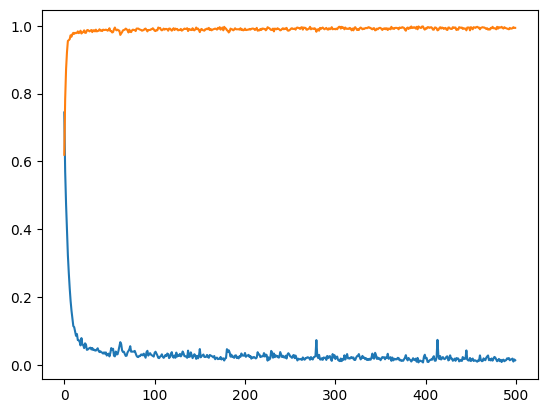

In [6]:
#I want to graph the loss of the model while training

import matplotlib.pyplot as plt

plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])

plt.show()

In [7]:
#I want a confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(y_pred, y_test)

print(confusion_matrix(test["tsunami"], y_pred))

#calculate the accuracy

print(accuracy_score(test["tsunami"], y_pred), precision_score(test["tsunami"], y_pred))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0] [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [

In [8]:
from sklearn.metrics import classification_report

print(classification_report(test["tsunami"], y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       162
         1.0       0.88      0.78      0.82         9

    accuracy                           0.98       171
   macro avg       0.93      0.89      0.91       171
weighted avg       0.98      0.98      0.98       171

